This notebook demonstrates Monte Carlo simulations using 20 days of observed data on trends of Covid-19 cases in Singapore.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df1 = pd.read_csv('corvid2019.csv')

In [3]:
df1.head()

,Date,Count,Cumulative
0,23-Jan-20,1,1
1,24-Jan-20,2,3
2,25-Jan-20,1,4
3,26-Jan-20,0,4
4,27-Jan-20,1,5


In [4]:
df1.dtypes

Date          object
Count          int64
Cumulative     int64
dtype: object

In [5]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [6]:
df1.head()

,Date,Count,Cumulative
0,2020-01-23,1,1
1,2020-01-24,2,3
2,2020-01-25,1,4
3,2020-01-26,0,4
4,2020-01-27,1,5


In [7]:
df1.shape[0]

20

In [8]:
df1['Count'].describe()

count    20.000000
mean      2.350000
std       1.814416
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: Count, dtype: float64

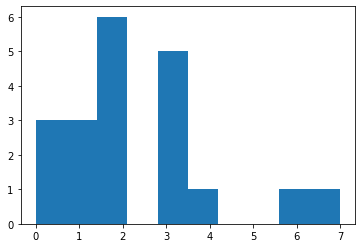

In [9]:
plt.hist(df1['Count'])
plt.show()

In [10]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [11]:
# assuming daily count comes from distribution following current observed data
np.random.choice(8, 5, p=[3/20, 3/20, 6/20, 5/20, 1/20, 0, 1/20, 1/20]).round()

array([4, 6, 2, 0, 7], dtype=int64)

In [12]:
# assuming distribution comes from normal distribution based on current observed data
np.random.normal(2.35, 1.81, 5).round() #note that there can be less than 0

array([4., 3., 4., 4., 4.])

In [13]:
df1['Cumulative'].max()

47

In [14]:
max(df1['Date'].dt.date)

datetime.date(2020, 2, 11)

In [15]:
# create list of running dates
pd.DataFrame({'Date': pd.date_range(start='2012-02-12', periods=5, freq='D')})

,Date
0,2012-02-12
1,2012-02-13
2,2012-02-14
3,2012-02-15
4,2012-02-16


#### How're we going to generate cumulative counts for the next few days 

In [16]:
num_days = 5

count_sim = np.random.choice(8, num_days, p=[3/20, 3/20, 6/20, 5/20, 1/20, 0, 1/20, 1/20]).round()

cuml_count_df = []

cuml_count = df1['Cumulative'].max() 

for j in range(0,num_days):
    cuml_count = cuml_count + count_sim[j]
    cuml_count_df.append((cuml_count))

In [17]:
pd.DataFrame({'cum_count' : cuml_count_df})

,cum_count
0,49
1,51
2,52
3,56
4,56


#### Generating the dataset with dates and daily counts and cumulative count 

In [18]:
num_days = 5

count_sim_df = []
cuml_count_df = []
date_list = []


# generate count for next num_days
count_sim = np.random.choice(8, num_days, p=[3/20, 3/20, 6/20, 5/20, 1/20, 0, 1/20, 1/20]).round()
count_sim_df = pd.DataFrame({'Count' : count_sim})
# cumulative count
cuml_count = df1['Cumulative'].max() 

for j in range(0,num_days):
    cuml_count = cuml_count + count_sim[j]
    cuml_count_df.append((cuml_count))
    cuml_sim_df = pd.DataFrame({'Cumulative' : cuml_count_df})

# create running dates    
date_list = pd.DataFrame({'Date': pd.date_range(start='2020-02-12', periods=num_days, freq='D')})

# combine all dataframes
df_sim = pd.concat([date_list, count_sim_df, cuml_sim_df], axis=1)

In [19]:
df_sim

,Date,Count,Cumulative
0,2020-02-12,2,49
1,2020-02-13,7,56
2,2020-02-14,2,58
3,2020-02-15,0,58
4,2020-02-16,2,60


In [20]:
df_sim_final = pd.DataFrame(columns=['Date', 'Count', 'Cumulative'])

In [21]:
df_sim_final = df_sim_final.append((df_sim))

In [22]:
df_sim_final

,Date,Count,Cumulative
0,2020-02-12,2,49
1,2020-02-13,7,56
2,2020-02-14,2,58
3,2020-02-15,0,58
4,2020-02-16,2,60


#### Running N simulations using current data distribution to simulate daily count 

In [23]:
num_sim = 100
num_days = 5

# Define a list to keep all the results from each simulation that we want to analyze
df_sim_final = pd.DataFrame(columns=['Date', 'Count', 'Cumulative'])
df_sim = []

# Loop through many simulations
for i in range(num_sim):

    count_sim_df = []
    cuml_count_df = []
    date_list = []

    
    # generate count for next num_days
    count_sim = np.random.choice(8, num_days, p=[3/20, 3/20, 6/20, 5/20, 1/20, 0, 1/20, 1/20]).round()
    count_sim_df = pd.DataFrame({'Count' : count_sim})
    # cumulative count
    cuml_count = df1['Cumulative'].max() 
    
    for j in range(0,num_days):
        cuml_count = cuml_count + count_sim[j]
        cuml_count_df.append((cuml_count))
        cuml_sim_df = pd.DataFrame({'Cumulative' : cuml_count_df})
        
    # create running dates    
    date_list = pd.DataFrame({'Date': pd.date_range(start='2020-02-12', periods=num_days, freq='D')})
    
    # combine all dataframes
    df_sim = pd.concat([date_list, count_sim_df, cuml_sim_df], axis=1)
    df_sim_final = df_sim_final.append((df_sim))

In [24]:
df_sim_final.tail()

,Date,Count,Cumulative
0,2020-02-12,1,48
1,2020-02-13,0,48
2,2020-02-14,0,48
3,2020-02-15,3,51
4,2020-02-16,3,54


In [25]:
df_sim_final.shape[0]

500

In [26]:
df = df1.copy()

In [27]:
list(df)

['Date', 'Count', 'Cumulative']

In [28]:
df = df.append(df_sim_final)

In [29]:
df.tail()

,Date,Count,Cumulative
0,2020-02-12,1,48
1,2020-02-13,0,48
2,2020-02-14,0,48
3,2020-02-15,3,51
4,2020-02-16,3,54


C:\Users\chua1\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


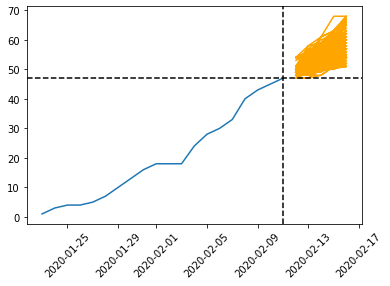

In [30]:
plt.plot('Date', 'Cumulative',data=df[df['Date']<='2020-02-11'])
plt.plot('Date', 'Cumulative',data=df[df['Date']>'2020-02-11'],color="orange")
plt.xticks(rotation=45)
plt.axvline(dt.datetime(2020, 2, 11),color = 'black',linestyle='--')
plt.axhline(y=47, color = 'black',linestyle='--')

#### Running N simulations using normal distribution to simulate daily count 

In [34]:
num_sim = 100
num_days = 5

# Define a list to keep all the results from each simulation that we want to analyze
df_sim_final = pd.DataFrame(columns=['Date', 'Count', 'Cumulative'])
df_sim = []

# Loop through many simulations
for i in range(num_sim):

    count_sim_df = []
    cuml_count_df = []
    date_list = []

    
    # generate count for next num_days
    count_sim = np.random.normal(2.35, 1.81, 5).round()
    count_sim_df = pd.DataFrame({'Count' : count_sim})
    # cumulative count
    cuml_count = df1['Cumulative'].max() 
    
    for j in range(0,num_days):
        cuml_count = cuml_count + max(count_sim[j],0)
        cuml_count_df.append((cuml_count))
        cuml_sim_df = pd.DataFrame({'Cumulative' : cuml_count_df})
        
    # create running dates    
    date_list = pd.DataFrame({'Date': pd.date_range(start='2020-02-12', periods=num_days, freq='D')})
    
    # combine all dataframes
    df_sim = pd.concat([date_list, count_sim_df, cuml_sim_df], axis=1)
    df_sim_final = df_sim_final.append((df_sim))

In [35]:
df = df1.copy()
df = df.append(df_sim_final)

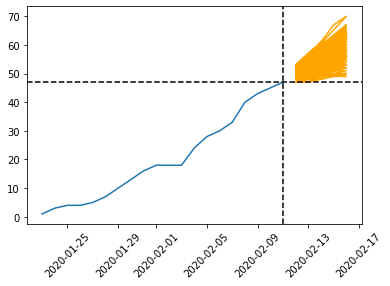

In [36]:
plt.plot('Date', 'Cumulative',data=df[df['Date']<='2020-02-11'])
plt.plot('Date', 'Cumulative',data=df[df['Date']>'2020-02-11'],color="orange")
plt.xticks(rotation=45)
plt.axvline(dt.datetime(2020, 2, 11),color = 'black',linestyle='--')
plt.axhline(y=47, color = 'black',linestyle='--')